In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.model_selection import train_test_split
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[cols]

In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y = df['Outcome']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(accuracy_score(y_pred,y_test))

0.7186147186147186


In [12]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [17]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

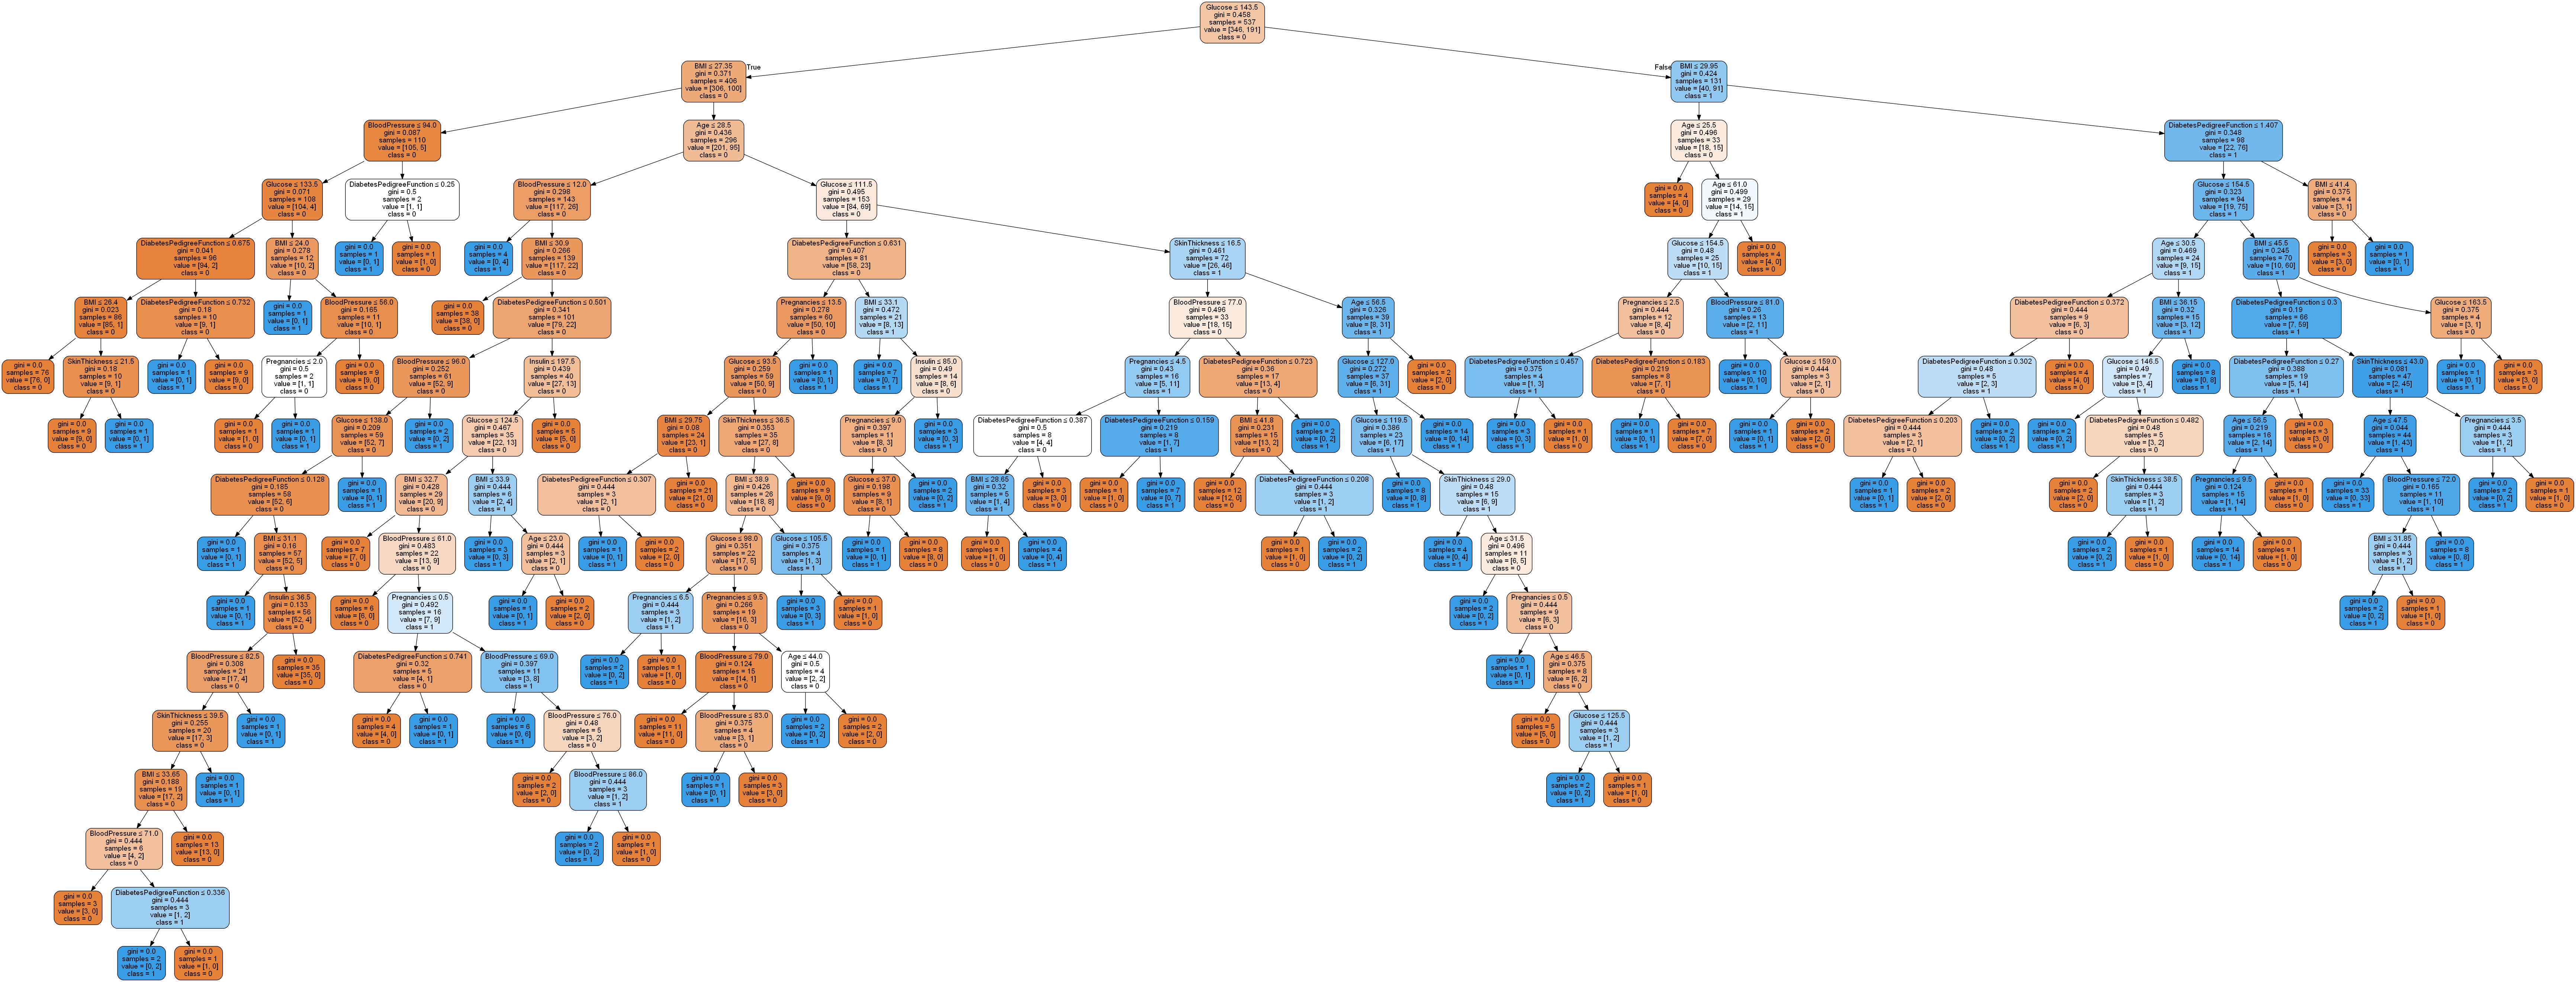

In [18]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())